##Machine Learning - UT - Spring 2024
##HW 3 - Q6
##Ali Khoramfar - 810102129

###Import Packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Preparing Dataset

In [3]:
dataset = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/ML HW3/prison_dataset.csv')

dataset.head()

Fiscal Year Released  Recidivism Reporting Year Race - Ethnicity  \
0                  2010                       2013            White   
1                  2010                       2013            White   
2                  2010                       2013            White   
3                  2010                       2013            White   
4                  2010                       2013            Black   

  Age At Release Convicting Offense Classification Convicting Offense Type  \
0            <45                          D Felony                 Violent   
1            >45                          D Felony                   Other   
2            <45                          D Felony                   Other   
3            >45                      Other Felony                    Drug   
4            <45                          D Felony                    Drug   

  Convicting Offense Subtype Main Supervising District Release Type  \
0                      Other                       3JD       Parole   
1                      Other                       3JD       Parole   
2                      Other                       5JD       Parole   
3                Trafficking                       3JD       Parole   
4                Trafficking                       3JD       Parole   

  Part of Target Population  Recidivism - Return to Prison numeric  
0                       Yes                                      1  
1                       Yes                                      1  
2                       Yes                                      1  
3                       Yes                                      1  
4                       Yes                                      1

In [ ]:
print(dataset.columns)

Index(['Fiscal Year Released', 'Recidivism Reporting Year', 'Race - Ethnicity',
       'Age At Release', 'Convicting Offense Classification',
       'Convicting Offense Type', 'Convicting Offense Subtype',
       'Main Supervising District', 'Release Type',
       'Part of Target Population', 'Recidivism - Return to Prison numeric'],
      dtype='object')


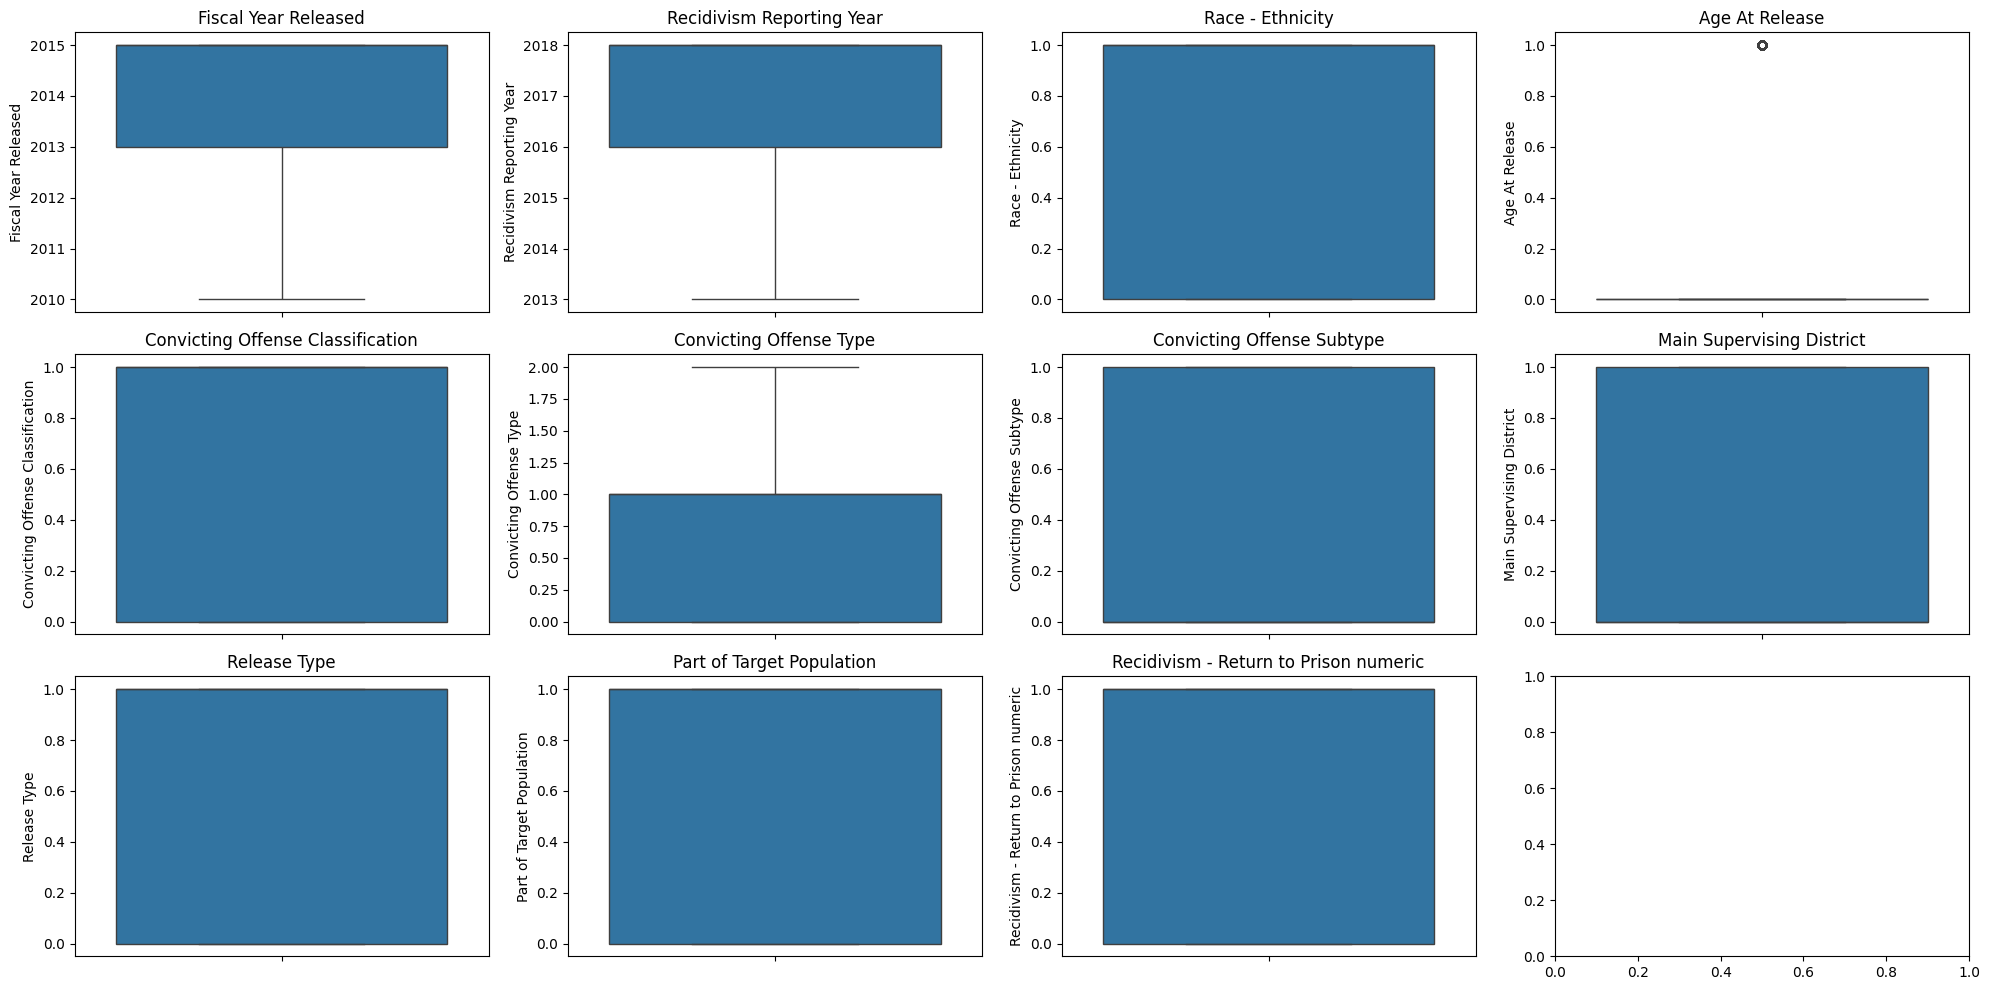

In [ ]:
def plot_boxplots(df, columns, rows, cols):
    fig, axes = plt.subplots(rows, cols, figsize=(20, 10))
    axes = axes.ravel()
    for idx, ax in enumerate(axes):
        if idx < len(columns):
            sns.boxplot(data=df, y=columns[idx], ax=ax)
            ax.set_title(columns[idx])
    plt.tight_layout()
    plt.show()

plot_boxplots(dataset, dataset.columns, 3, 4)

## Functions for Decision Tree

In [4]:
def entropy(y):
    unique, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    ent = -np.sum(probabilities * np.log2(probabilities))
    return ent

def information_gain(X, y, feature):
    total_entropy = entropy(y)
    values, counts = np.unique(X[feature], return_counts=True)
    weighted_entropy = np.sum([(counts[i] / np.sum(counts)) * entropy(y[X[feature] == values[i]]) for i in range(len(values))])
    info_gain = total_entropy - weighted_entropy
    return info_gain

### Dicision Tree

In [8]:
def build_tree(X, y, depth=0, max_depth=3):
    if depth == max_depth or len(np.unique(y)) == 1:
        return np.bincount(y).argmax()

    best_feature = max(X.columns, key=lambda feature: information_gain(X, y, feature))
    tree = {best_feature: {}}

    for value in np.unique(X[best_feature]):
        subset_X = X[X[best_feature] == value]
        subset_y = y[X[best_feature] == value]
        tree[best_feature][value] = build_tree(subset_X, subset_y, depth + 1, max_depth)

    return tree

def predict_one(tree, x):
    while isinstance(tree, dict):
        feature = next(iter(tree))
        value = x[feature]
        if value in tree[feature]:
            tree = tree[feature][value]
        else:
            return 0
    return tree

def predict(tree, X):
    predictions = X.apply(lambda x: predict_one(tree, x), axis=1)
    return predictions


## Build Tree

In [7]:
X = dataset.drop(columns=['Recidivism - Return to Prison numeric'])
y = dataset['Recidivism - Return to Prison numeric'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree = build_tree(X_train, y_train, max_depth=3)

In [10]:
y_pred = predict(tree, X_test)

accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(cm)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Precision:", precision)
print("Recall:", recall)


Accuracy: 0.7215559157212318
Confusion Matrix:
[[1092  265]
 [ 594 1134]]
Precision: 0.810578984989278
Recall: 0.65625


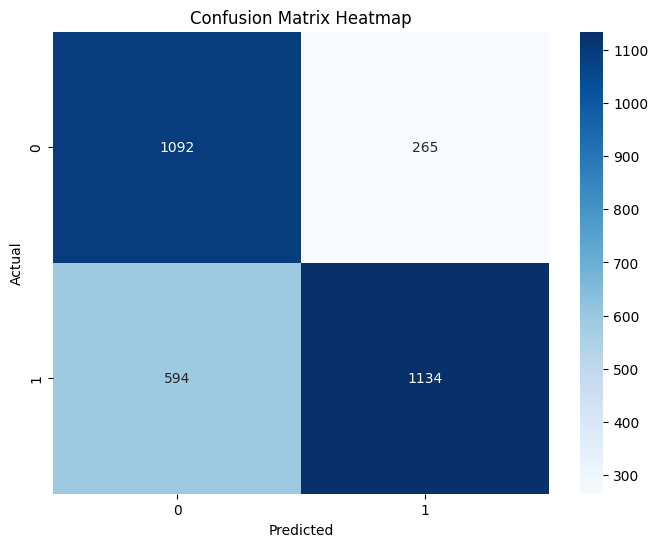

In [11]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()